# Basic image manipulation

This scrip show how to do basic operations on image using scipy and numpy following this [tutorial](http://www.scipy-lectures.org/advanced/image_processing/).


In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import os
%matplotlib inline


In [2]:
#Usefull functions

def one_channel(image):
    return image[:,:,0]

def remove_left(image):
    return image[:, 12:]

def crop6char(image,cropsize=28):
    """
    Function to crop 6 characters from image
    """
    number_of_char = 6
    all_char = []
    left_cut = 0
    right_cut = 0
    for _ in range(number_of_char):
        right_cut += cropsize
        char_image = image[:, left_cut:right_cut]
        all_char.append(char_image)
        left_cut += cropsize
    return all_char


def cap2array(folder_name):
    """
    Function to transform all images and return one array
    """
    all_images = []
    for filename in os.listdir(folder_name):
        image_path = os.path.join(folder_name,filename)
        image = misc.imread(image_path)
        image = one_channel(image)
        image = remove_left(image)
        all_images.extend(crop6char(image))
    return np.array(all_images)


def plot6images(images, label, prediction=None):
    """
    Function to show 6 images with their respective classes.
    If prediction is an string, you can see the image, the true label
    and the prediction.
    :type images: list or np array
    :type label: string
    :type prediction: None or sting
    """
    label = list(label)
    assert len(images) == len(label) == 6
    if prediction is not None:
        prediction = list(prediction)
        assert len(images) == len(prediction) == 6
    fig, axes = plt.subplots(2, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        if prediction is None:
            xlabel = "True: {0}".format(label[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(label[i], prediction[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

### One example of one captcha

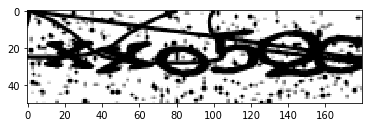

shape =  (50, 180)


In [3]:
#flatting to be one layer only
raw_example = one_channel(misc.imread("data/1.png"))
plt.imshow(raw_example,cmap='gray')
plt.show()
print("shape = ", raw_example.shape)

### Removing space on the left

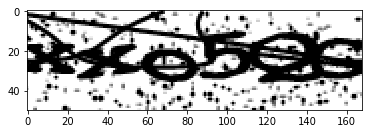

shape =  (50, 168)


In [4]:
example = remove_left(raw_example)
plt.imshow(example, cmap='gray')
plt.show()
print("shape = ", example.shape)

### Croping each char with of the image
### all the sub  images have the same shape

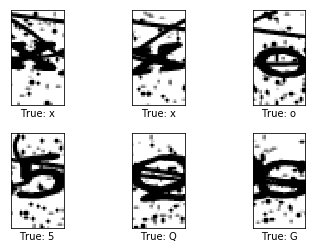

(50, 28)
(50, 28)
(50, 28)
(50, 28)
(50, 28)
(50, 28)


In [5]:
ex1 = crop6char(example)
plot6images(ex1, "xxo5QG")
for image in ex1:
    print(image.shape)

### We can transform all images in the folder in one single numpy array

In [6]:
all_images = cap2array("data")
print(all_images.shape)

(60, 50, 28)
